In [ ]:
#default_exp PracticalDeepLearning.Lesson1.CourseWork

In [ ]:
#hide
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Lesson 1
> Image Classification using Fastaiv2

Notes following the first lesson of the fastai 2019 Deep Learning for Practitioners Course. Code follows the lesson using fastaiv2, fastcore and is documented using the nbdev library.

In [ ]:
#exports
from fastai2.data.all import *
from fastai2.vision.all import *
from nbdev.showdoc import *

# Looking at the data

## Getting the dataset
Just like in Lesson 1, we will be using the [Oxford-III3](http://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf) Dataset. In fastaiv2 the syntax is similar, except we can't install everything just by importing fastai. To import untar we need to make sure we are importing `fastai.data.all` or `fastai.data`.

To get a better idea of how untar looks like, we use the show_doc function from nbdev.
> Note: This typically won't work for non-fastai functions.

In [ ]:
#show
#show_doc(untar_data)

<h4 id="untar_data" class="doc_header"><code>untar_data</code><a href="https://github.com/fastai/fastai2/tree/master/fastai2/data/external.py#L202" class="source_link" style="float:right">[source]</a></h4>

> <code>untar_data</code>(**`url`**, **`fname`**=*`None`*, **`dest`**=*`None`*, **`c_key`**=*`'data'`*, **`force_download`**=*`False`*, **`extract_func`**=*`'file_extract'`*)

Download `url` to [`fname`](PracticalDeepLearning2019.Lesson1#fname) if `dest` doesn't exist, and un-tgz to folder `dest`.

We also still have the URLs from before, and we can look at the doc for the URLs class and for the object that comes out of URLs.PETS. URLs is just a class object that stores all of fastai's datasets, printing URLs.PETS gives us the last url file as a string just like it says in the docs.

If we wanted to download a different dataset to work with fastai, all we would have to do is pass the dataset download link to untar_data.

In [ ]:
#show
#show_doc(URLs)
#show_doc(URLs.PETS)
#print(URLs.PETS)

<h2 id="URLs" class="doc_header"><code>class</code> <code>URLs</code><a href="https://github.com/fastai/fastai2/tree/master/fastai2/data/external.py#L49" class="source_link" style="float:right">[source]</a></h2>

> <code>URLs</code>()

Global constants for dataset and model URLs.

<h4 id="tgz" class="doc_header"><code>tgz</code><a href="" class="source_link" style="float:right">[source]</a></h4>

str(object='') -> str
str(bytes_or_buffer[, encoding[, errors]]) -> str

Create a new string object from the given object. If encoding or
errors is specified, then the object must expose a data buffer
that will be decoded using the given encoding and error handler.
Otherwise, returns the result of object.__str__() (if defined)
or repr(object).
encoding defaults to sys.getdefaultencoding().
errors defaults to 'strict'.

https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz


Putting this together gives us a small download indicator (unless the dataset was already downloaded). The untar_data function also returns a Path object of where the dataset is located. Because of this, it's better to store the output to a variable like "path".

In [ ]:
#exports
path = untar_data(URLs.PETS)

We can see what's inside this dataset using the Path method ls. One thing to notice is that the output is not a normal python list anymore, now it's an L object from the fastcore library. This is because the object is "patched" once to import fastcore.utils. We can see this with show_doc as well since the source leads us to the fastcore library repo.

In [ ]:
#show
#show_doc(path.ls)
#path.ls()

<h4 id="Path.ls" class="doc_header"><code>Path.ls</code><a href="https://github.com/fastai/fastcore/tree/master/fastcore/utils.py#L438" class="source_link" style="float:right">[source]</a></h4>

> <code>Path.ls</code>(**`n_max`**=*`None`*, **`file_type`**=*`None`*, **`file_exts`**=*`None`*)

Contents of path as a list

(#2) [Path('/home/holydemon/.fastai/data/oxford-iiit-pet/annotations'),Path('/home/holydemon/.fastai/data/oxford-iiit-pet/images')]

In [ ]:
#exports
path_anno, path_img = [path/folder for folder in path.ls()]

## Opening the files
To get the image files call the get_image_files function. If you have files that aren't images you can use the get_files function and pass the mime file extensions that you are looking for as a parameter.

In [ ]:
#show
#show_doc(get_files)
#show_doc(get_image_files)

<h4 id="get_files" class="doc_header"><code>get_files</code><a href="https://github.com/fastai/fastai2/tree/master/fastai2/data/transforms.py#L23" class="source_link" style="float:right">[source]</a></h4>

> <code>get_files</code>(**`path`**, **`extensions`**=*`None`*, **`recurse`**=*`True`*, **`folders`**=*`None`*)

Get all the files in [`path`](PracticalDeepLearning2019.Lesson1#path) with optional `extensions`, optionally with `recurse`, only in `folders`, if specified.

<h4 id="get_image_files" class="doc_header"><code>get_image_files</code><a href="https://github.com/fastai/fastai2/tree/master/fastai2/data/transforms.py#L51" class="source_link" style="float:right">[source]</a></h4>

> <code>get_image_files</code>(**`path`**, **`recurse`**=*`True`*, **`folders`**=*`None`*)

Get image files in [`path`](PracticalDeepLearning2019.Lesson1#path) recursively, only in `folders`, if specified.

In [ ]:
#exports
fname = get_image_files(path_img)
fname[:5]

(#5) [Path('/home/holydemon/.fastai/data/oxford-iiit-pet/images/Sphynx_48.jpg'),Path('/home/holydemon/.fastai/data/oxford-iiit-pet/images/samoyed_126.jpg'),Path('/home/holydemon/.fastai/data/oxford-iiit-pet/images/boxer_20.jpg'),Path('/home/holydemon/.fastai/data/oxford-iiit-pet/images/scottish_terrier_161.jpg'),Path('/home/holydemon/.fastai/data/oxford-iiit-pet/images/shiba_inu_84.jpg')]

Now that we have the data we can simply open the file with the PIL library which was imported in fastai2.core

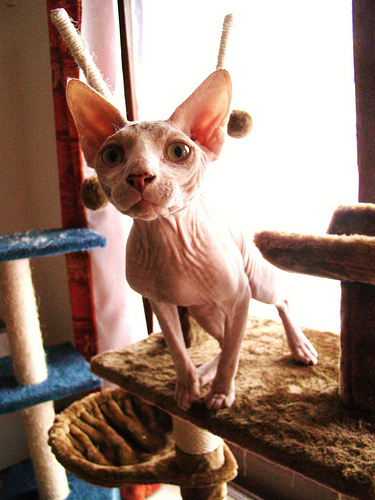

In [ ]:
#exports
img = Image.open(fname[0]).convert('RGB')
img

## Viewing the data with labels

With the new fastcore functionality, we can define an object with a show function to be able to see it in various functions like show_batch. For simple image classification this is fairly straight forward, especially because fastai2 has most of the common tools implemented already using fastcore.

Some of the functions we didn't already see are RandomSplitter, Resize, aug_transforms and RegexLabeller.

There are also the ItemBlock classes that need to be used for fastai compatability. In this case we can use ImageBlock and CategoryBlock

In [ ]:
#show
#show_doc(RandomSplitter)
#show_doc(Resize)
#show_doc(aug_transforms)
#show_doc(RegexLabeller)

<h4 id="RandomSplitter" class="doc_header"><code>RandomSplitter</code><a href="https://github.com/fastai/fastai2/tree/master/fastai2/data/transforms.py#L67" class="source_link" style="float:right">[source]</a></h4>

> <code>RandomSplitter</code>(**`valid_pct`**=*`0.2`*, **`seed`**=*`None`*, **\*\*`kwargs`**)

Create function that splits `items` between train/val with `valid_pct` randomly.

<h2 id="Resize" class="doc_header"><code>class</code> <code>Resize</code><a href="https://github.com/fastai/fastai2/tree/master/fastai2/vision/augment.py#L190" class="source_link" style="float:right">[source]</a></h2>

> <code>Resize</code>(**`size`**, **`method`**=*`'crop'`*, **`pad_mode`**=*`'reflection'`*, **`resamples`**=*`(2, 0)`*, **\*\*`kwargs`**) :: `RandTransform`

A transform that before_call its state at each `__call__`

<h4 id="aug_transforms" class="doc_header"><code>aug_transforms</code><a href="https://github.com/fastai/fastai2/tree/master/fastai2/vision/augment.py#L764" class="source_link" style="float:right">[source]</a></h4>

> <code>aug_transforms</code>(**`mult`**=*`1.0`*, **`do_flip`**=*`True`*, **`flip_vert`**=*`False`*, **`max_rotate`**=*`10.0`*, **`max_zoom`**=*`1.1`*, **`max_lighting`**=*`0.2`*, **`max_warp`**=*`0.2`*, **`p_affine`**=*`0.75`*, **`p_lighting`**=*`0.75`*, **`xtra_tfms`**=*`None`*, **`size`**=*`None`*, **`mode`**=*`'bilinear'`*, **`pad_mode`**=*`'reflection'`*, **`batch`**=*`False`*, **`min_scale`**=*`1.0`*)

Utility func to easily create a list of flip, rotate, zoom, warp, lighting transforms.

<h2 id="RegexLabeller" class="doc_header"><code>class</code> <code>RegexLabeller</code><a href="https://github.com/fastai/fastai2/tree/master/fastai2/data/transforms.py#L131" class="source_link" style="float:right">[source]</a></h2>

> <code>RegexLabeller</code>(**`pat`**, **`match`**=*`False`*)

Label `item` with regex [`pat`](PracticalDeepLearning2019.Lesson1#pat).

In [ ]:
#exports
pat = r'/(\w+)_\d+.jpg'

dblock = DataBlock((ImageBlock,CategoryBlock),
                    splitter=RandomSplitter(),
                    get_items=get_image_files,
                    item_tfms=Resize(224),
                    batch_tfms=aug_transforms(),
                    get_y=RegexLabeller(pat))

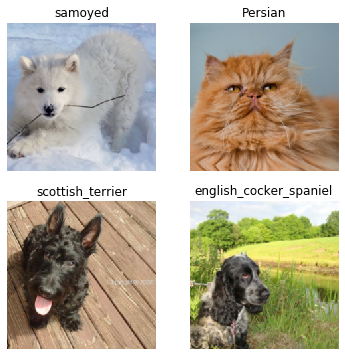

In [ ]:
#exports
dls = dblock.dataloaders(path_img, bs=4)

dls.show_batch()

# Learners

Now we will try to build a model that can reliably predict what animal breed is being shown in the image. The state of the art results when this dataset was released back in 2012 was about 60% accuracy, or as we will see later, 40% error. The model that managed to achieve these results was made specifically for pets and had very complicated systems for each micro task.

## Pre Trained Models
To train our model we only need to run the following code. Although it doesn't show it below, fastai chooses what device to run the training on by it's self. If you have a gpu enabled it will automatically grab the first one for training.

In case you don't know if you have your gpu enabled or not simply check with pytorch.

In [ ]:
#exports
import torch
print(torch.cuda.is_available())

True


To train all we need to do is pass our dataloaders and a model to the Learner contructor. Usually for basic classification we can just use a resnet architecture around the size of our dataset.

But with just this we won't be able to tell how well our training is going, so we add `metrics=error_rate` which calculates the accuracy we get in the validation set.

epoch,train_loss,valid_loss,error_rate,time
0,3.648826,3.715382,0.948579,03:24
1,3.544055,3.508427,0.948579,03:22
2,3.488434,3.469575,0.933018,03:23
3,3.473608,3.431377,0.924899,03:23


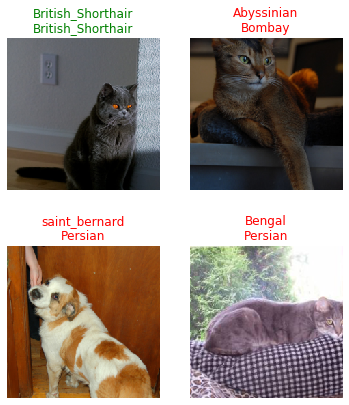

In [ ]:
#show
learner = Learner(dls, resnet34(), metrics=error_rate)
learner.fit(4)
learner.show_results()

Sadly this didn't go to well, with the results we saw above we might as well be guessing. The thing is we were only using the resnet architecture but not the trained parameters. If we use the pretrained version of resnet we can take advantage of the transfer learning which will have better generalized results and converge faster.

If this is the first time using this specific model fastai will download it to your computer. Because of this you will need an internet connection the first time you train. After that you will can simply run the code without having to wait.

epoch,train_loss,valid_loss,error_rate,time
0,3.734631,3.716850,0.975643,03:23
1,3.609937,3.855821,0.944520,03:23
2,3.493834,10.226597,0.945873,03:23
3,3.501546,3.347388,0.913396,03:23


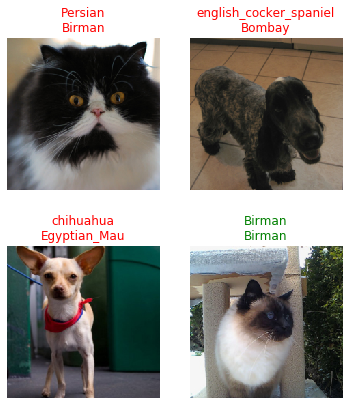

In [ ]:
#show
learner = Learner(dls, resnet34(pretrained=True), metrics=error_rate)
learner.fit(4)
learner.show_results()

But... this still doesn't seem to be enough. We only get slightly better results than before and we even have a spike in our validation loss. This could be better improved with variable tweaks but fastai has an even better training function that will work better.

## Using fastai's fit_one_cycle

One of the reasons fastai has such great out of the box results is because of all of the state of the art best practices that are prebuilt into it's library. Some of them are deeply built inside the library that removing them is very complicated, for example removing the validation set for training.

Here we will look at the one cycle training which resulted from a paper around 2018. One cycle changes the learning rate during training which allows better convergance, which leads to less epochs. This means the neural network sees the data less and this helps avoid overfitting. Lets compair the results from one_cycle training with the results above.

epoch,train_loss,valid_loss,error_rate,time
0,3.300937,4.512791,0.891069,03:23
1,2.277554,2.641377,0.653586,03:23
2,1.488740,1.141782,0.348444,03:23
3,1.044680,0.860326,0.263870,03:13


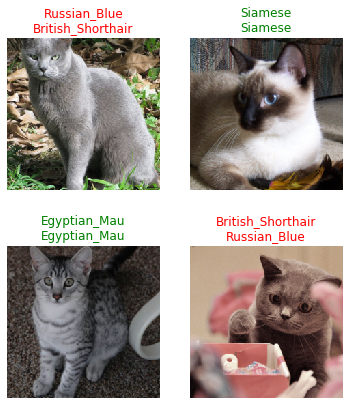

In [ ]:
#show
learner = Learner(dls, resnet34(pretrained=True), metrics=error_rate)
learner.fit_one_cycle(4)
learner.show_results()

In one epoch we already achieved better results than before, not only that but after 3 epochs we achieved better results than the original 2012 paper. This is clearly without much training and even less parameter tweaking, which 

One thing to remember is that the training methods are named differently, which means that you need to be careful not to forget to use fit_one_cycle instead of fit.

## Mixed Precision

Another advancement that happend in the last couple of years is the idea of mixed precision which was studied by Nvidia. There's a conference [video](http://on-demand.gputechconf.com/gtc/2018/video/S81012/) which goes much more into detail, but for now we will only look at the benefits.

- Faster Training (2-4 times faster)
- Light Weight (Using half the memory)
- Enables better batch size, more parameters, bigger resolution data etc...
- No Loss in Weight Precision
- No need to change the architecture

epoch,train_loss,valid_loss,error_rate,time
0,3.412876,4.361121,0.949932,03:40
1,2.293113,4.464961,0.691475,03:39
2,1.627670,1.190641,0.359269,03:24
3,1.203482,1.004132,0.288904,03:15


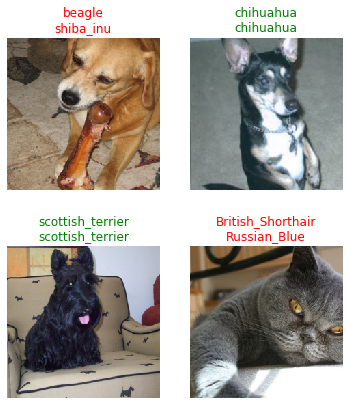

In [ ]:
#show
learner = Learner(dls, resnet34(pretrained=True), metrics=error_rate).to_fp16()
learner.fit_one_cycle(4)
learner.show_results()

For now this didn't give us the faster results we were expecting, but this was run on a standard laptop dedicated gpu. Because of this it's possible that it was unable to take advantage of the function call which made it default back to normal training. Further testing is needed.

## XResNet


In fastaiV2 there is a sudden shift in preferred pretrained convolutional model, from ResNet to XResNet. XResNet seems to be the same architecture trained using the "bag of tricks" augmentations. These are various tricks that generally give better results. This can be better explained in this [article](https://towardsdatascience.com/a-big-of-tricks-for-image-classification-fec41eb28e01).

So the question is, clearly, how does it match up with the results we achieved before? Below are the tests with xresnet34, xresnet34_deep and xresnet_deeper, which as the name describes are simply deeper versions of the resnet architecture.

Downloading: "https://s3.amazonaws.com/fast-ai-modelzoo/xrn50_940.pth" to /home/holydemon/.cache/torch/checkpoints/xrn50_940.pth
100%|██████████| 244M/244M [01:32<00:00, 2.77MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,3.165014,4.820169,0.932341,03:28
1,2.716171,2.864691,0.714479,03:31
2,2.096821,1.969552,0.560893,03:27
3,2.017629,1.917515,0.558863,03:24


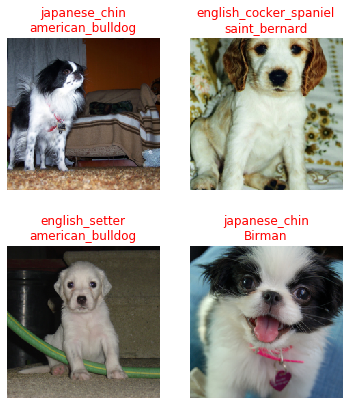

In [ ]:
#show
learner = Learner(dls, xresnet34(pretrained=True), metrics=error_rate).to_fp16()
learner.fit_one_cycle(4)
learner.show_results()

epoch,train_loss,valid_loss,error_rate,time
0,3.198772,3.269087,0.889716,03:52
1,2.568339,2.664047,0.702977,03:41
2,2.237659,2.095842,0.611637,03:39
3,1.903368,1.799592,0.541272,03:49


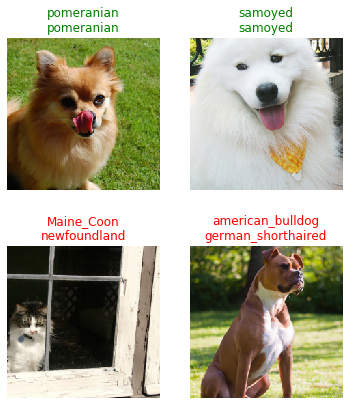

In [ ]:
#show
learner = Learner(dls, xresnet34_deep(pretrained=True), metrics=error_rate).to_fp16()
learner.fit_one_cycle(4)
learner.show_results()

epoch,train_loss,valid_loss,error_rate,time
0,3.134247,3.224895,0.847091,03:52
1,2.638292,3.003423,0.753721,03:55
2,2.250711,1.876449,0.555480,03:55
3,2.006802,1.795163,0.533830,03:53


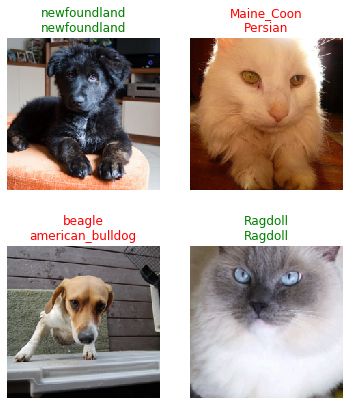

In [ ]:
#show
learner = Learner(dls, xresnet34_deeper(pretrained=True), metrics=error_rate).to_fp16()
learner.fit_one_cycle(4)
learner.show_results()

From the three results we can see that xresnet performs much worse than normal resnet, while the other deeper versions compair more resonably to it. This is, however without any fine tuning, which is what we should explore in the next part.

## Final Notes

Clearly these results are not final, one run for each model and method is not significant enough for most cases especially when working with machine learning. That being said the results do give us quite a good idea about how much better some of these methods are and why fastai uses one over another.